In [1]:
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
hdu = fits.open('/Volumes/quinn_casey/eboss/spLine_trim_dr16_eboss.fits')

In [4]:
hdu[1].header

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.11           
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =                  336 /Number of bytes per row                         
NAXIS2  =              1910807 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                   82 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
COMMENT                                                                         
COMMENT  *** Column names **

In [5]:
ha = hdu[1].data['H_ALPHA_FLUX'].tolist()
ha_err = hdu[1].data['H_ALPHA_FLUX_ERR'].tolist()
z = hdu[1].data['Z'].tolist()

In [7]:
df_data = {'ha':ha, 'ha_err':ha_err, 'z':z}

df = pd.DataFrame(df_data)

In [8]:
df

,ha,ha_err,z
0,0.0,-1.0,0.834118
1,0.0,-1.0,0.744703
2,0.0,-2.0,0.607398
3,0.0,-1.0,0.648600
4,0.0,-2.0,0.597451
...,...,...,...
1910802,0.0,-1.0,1.037471
1910803,0.0,-1.0,0.742518
1910804,0.0,-1.0,1.056773
1910805,0.0,-1.0,1.012589


In [17]:
df = df.loc[df['ha'] > -10]
df = df.loc[df['ha'] != 0]
df = df.loc[df['ha_err'] > -2]
df = df.loc[df['z'] < 0.2]

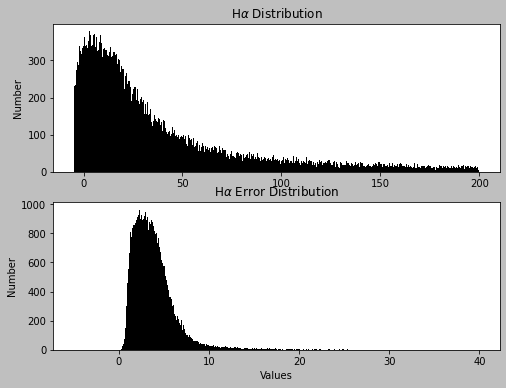

In [37]:
plt.style.use('grayscale')
fig, axs = plt.subplots(2, sharex=False, sharey=False, figsize=(8,6))
#bins = (-10, 100, 5000)
ha_ax = axs[0].hist(df['ha'], bins= 1000, range=(-5, 200))
axs[0].set_title(r'H$\alpha}$ Distribution')
ha_err_ax = axs[1].hist(df['ha_err'], bins = 1000, range=(-5, 40))
axs[1].set_title(r'H$\alpha}$ Error Distribution')
axs[1].set_xlabel('Values')
axs[1].set_ylabel('Number')
axs[0].set_ylabel('Number')
plt.show()

In [20]:
print(np.median(df['ha']))
print(np.min(df['ha']))
print()
print(np.max(df['ha_err']))
print(np.min(df['ha_err']))

25.517395973205566
-9.997809410095215

908.0955200195312
0.11043740063905716
